In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
# i needed to add the path
candidate_scores = pd.read_csv('data\candidate_scores.csv')
hr_scores = pd.read_csv('data\hr_scores.csv')

# Section 1

First, I wanted to take a look at the data before merging them.

In [5]:
candidate_scores.head()

,id,createdAt,updatedAt,candidateName,overallScore,dataSources,status,professionalScore,culturalScore,teamScore,punchline,contextID
0,38,27:17.2,27:52.4,Zephyr Rift Stormwind,80.0,"{Linkedin,CV}",Completed,79,74.0,75.0,"Strong fit with minor industry-specific gap, v...",10
1,39,27:48.9,28:30.1,Luna Moonbeam,75.0,"{Linkedin,CV}",Completed,82,62.0,60.0,"Strong foundation, potential for growth in new...",10
2,35,25:30.7,26:11.9,Raven Nightshade ©±ð�©¨ð�©¥ð�©§ð�©¥ð�©¯ ð�©²ð�...,50.0,"{Linkedin,CV}",Completed,45,38.0,37.5,"Promising candidate with potential, needs indu...",10
3,36,26:17.4,27:00.1,Phoenix Ashfire,70.0,"{Linkedin,CV}",Completed,84,74.0,75.0,Potential fit with room for growth in industry...,10
4,37,26:51.1,27:28.1,Echo Whisperwind ðŸ‡®ðŸ‡±,70.0,"{Linkedin,CV}",Completed,81,64.0,65.0,Skilled product manager with potential to adap...,10


In [6]:
hr_scores.head()

,candidateName,hrScore
0,Zephyr Rift Stormwind,2
1,Luna Moonbeam,2
2,Raven Nightshade',4
3,Phoenix Ashfire,2
4,Echo Whisperwind,3


In [24]:
print(f"Shape of the candidate scores dataset:{candidate_scores.shape}")
print(f"Shape of the hr scores dataset:{hr_scores.shape}")

Shape of the candidate scores dataset:(79, 12)
Shape of the hr scores dataset:(52, 2)


I believe we want to compare the HR scores to the overall score, so I decided to use an inner join and ignore candidates without HR scores (NaN values). If we needed to consider candidates without HR scores, I would use a left join to ensure they are not removed from the table.

In [57]:
combined_candidates = pd.merge(candidate_scores, hr_scores, on='candidateName', how='inner')
combined_candidates.to_csv('data/combined_candidates.csv', index=False)

In [58]:
combined_candidates.head()

,id,createdAt,updatedAt,candidateName,overallScore,dataSources,status,professionalScore,culturalScore,teamScore,punchline,contextID,hrScore
0,38,27:17.2,27:52.4,Zephyr Rift Stormwind,80.0,"{Linkedin,CV}",Completed,79,74.0,75.0,"Strong fit with minor industry-specific gap, v...",10,2
1,39,27:48.9,28:30.1,Luna Moonbeam,75.0,"{Linkedin,CV}",Completed,82,62.0,60.0,"Strong foundation, potential for growth in new...",10,2
2,36,26:17.4,27:00.1,Phoenix Ashfire,70.0,"{Linkedin,CV}",Completed,84,74.0,75.0,Potential fit with room for growth in industry...,10,2
3,40,28:14.1,28:44.1,Orion Stargazer,70.0,"{Linkedin,CV}",Completed,77,65.0,70.0,Promising fit with room for industry-specific ...,10,4
4,41,28:49.3,29:26.9,Sage Evergreen,75.0,"{Linkedin,CV}",Completed,79,69.0,69.0,Solid foundation with potential for growth in ...,10,3


In [59]:
print(f"Shape of the whole dataset:{combined_candidates.shape}")

Shape of the whole dataset:(46, 13)


In [60]:
combined_candidates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 46 non-null     int64  
 1   createdAt          46 non-null     object 
 2   updatedAt          46 non-null     object 
 3   candidateName      46 non-null     object 
 4   overallScore       46 non-null     float64
 5   dataSources        46 non-null     object 
 6   status             46 non-null     object 
 7   professionalScore  46 non-null     int64  
 8   culturalScore      46 non-null     float64
 9   teamScore          46 non-null     float64
 10  punchline          46 non-null     object 
 11  contextID          46 non-null     int64  
 12  hrScore            46 non-null     int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 5.0+ KB


After the inner join we won't have missing values.

In [61]:
combined_candidates.describe().round(3)

,id,overallScore,professionalScore,culturalScore,teamScore,contextID,hrScore
count,46.000,46.000,46.000,46.000,46.000,46.0,46.000
mean,76.283,68.609,74.696,62.409,62.228,10.0,3.130
std,23.923,9.125,10.112,10.296,10.348,0.0,1.185
min,36.000,45.000,46.000,35.600,37.500,10.0,1.000
25%,54.250,65.000,72.250,58.050,57.500,10.0,2.000
50%,81.500,70.000,78.000,65.000,62.500,10.0,4.000
75%,94.750,75.000,80.750,69.000,70.000,10.0,4.000
max,113.000,80.000,87.000,78.000,77.500,10.0,4.000


We can gain basic insights into various aspects, including average values, the minimum and maximum values that may indicate feature scaling, and the spread (std) of the features. ContextID has the same value for all rows. We don't have binary features.

In [77]:
categorical_features = combined_candidates.select_dtypes(['object']).columns.to_list()
continuous_features = combined_candidates.select_dtypes(['float64','int64']).columns[combined_candidates.select_dtypes(['float64','int64']).nunique() > 2].tolist()

print("\nThe continuous features are:\n",continuous_features) 
print("\nAnd the categorical features are:\n",categorical_features)


The continuous features are:
 ['id', 'overallScore', 'professionalScore', 'culturalScore', 'teamScore', 'hrScore']

And the categorical features are:
 ['createdAt', 'updatedAt', 'candidateName', 'dataSources', 'status', 'punchline', 'binary_HR', 'predicted_category', 'final_prediction']


I believe that the column `contextID`, which has the same value for all rows (as observed in the descriptive statistics), and the `id`, `dataSources`, `status` column will not provide additional insights, so I want to remove them before ploting. 

Reminder - if time allows remove them and update the plots

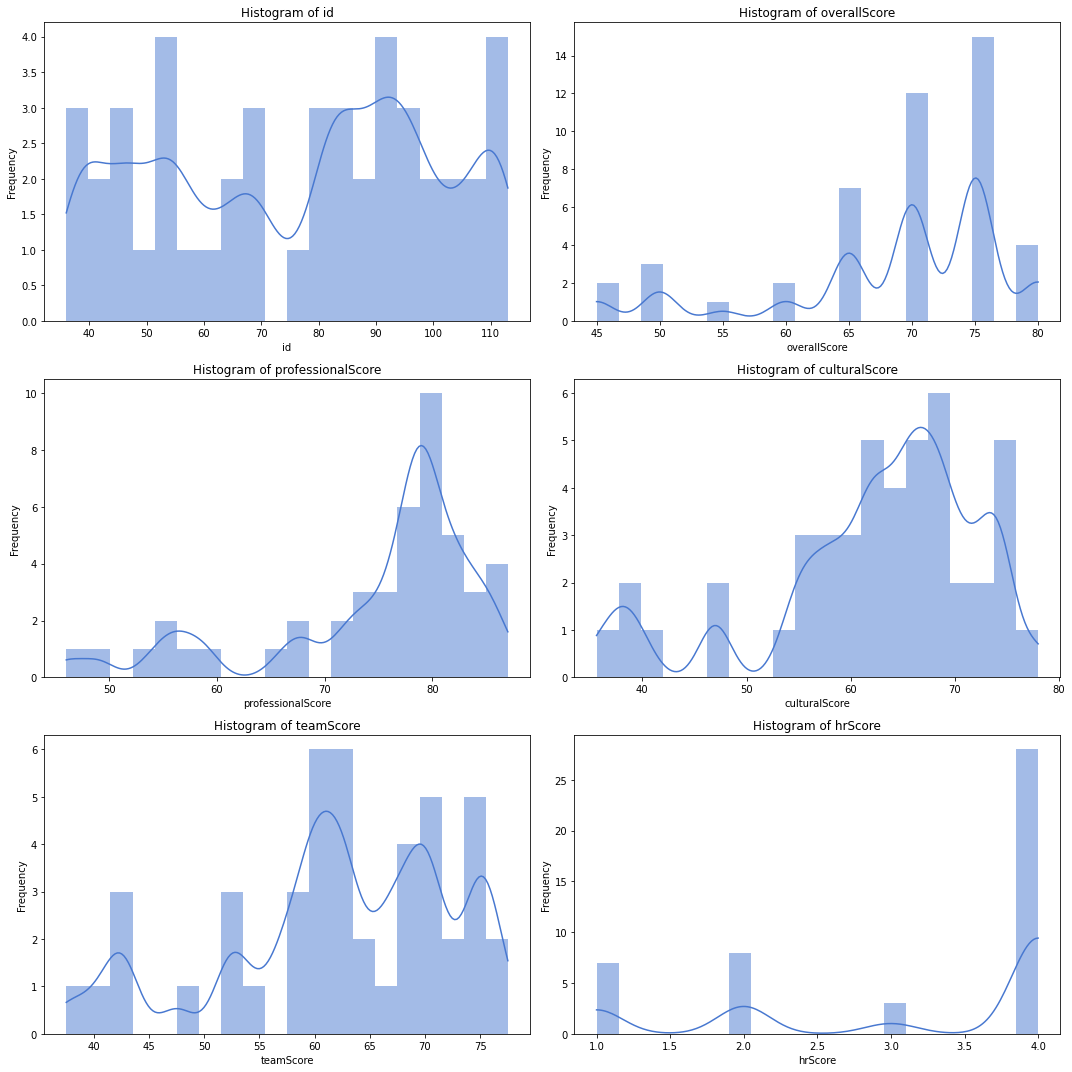

In [78]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
sns.set_palette('muted')

# Loop through each continuous feature and create a histogram
for i, feature in enumerate(continuous_features):
    ax = axes[i]
    sns.histplot(combined_candidates[feature], ax=ax, bins=20, edgecolor='none', kde=True, kde_kws={'bw_method': 0.15})
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of {}'.format(feature))

# Adjust layout
plt.tight_layout()
plt.show()

Reminder - If time allows, remove contextID and id columns.

<AxesSubplot:>

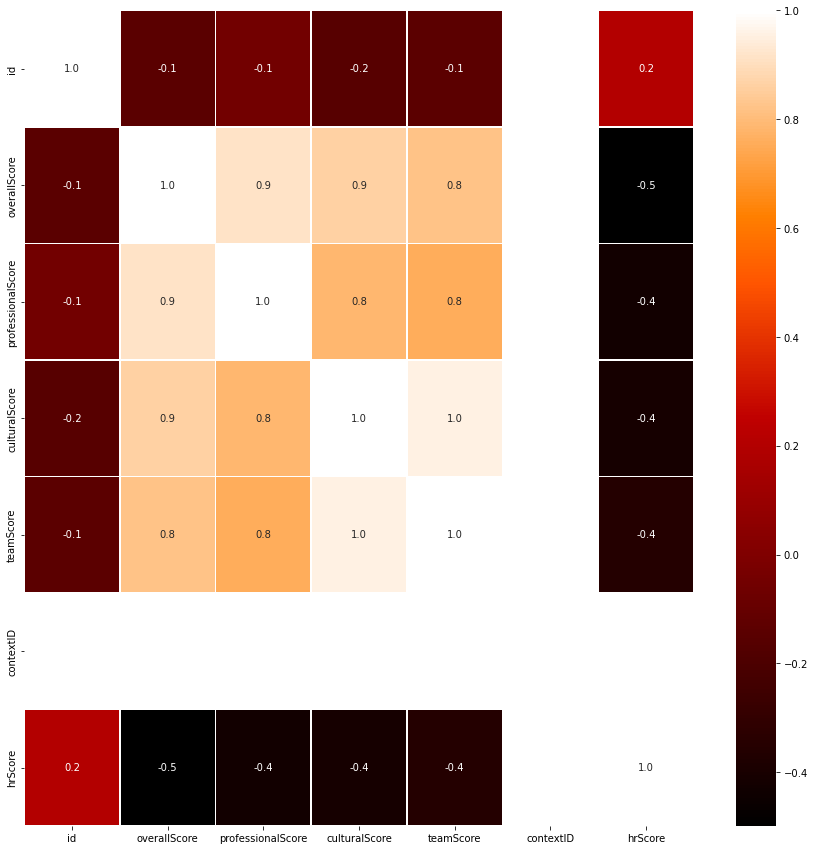

In [79]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(combined_candidates.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='gist_heat')

In [86]:
# Count the number of unique categories in the 'punchline' column
unique_categories_count = combined_candidates['punchline'].nunique()
unique_names_count = combined_candidates['candidateName'].nunique()


# Output the result
print("Number of unique categories in 'punchline':", unique_categories_count)
print("Number of unique categories in 'candidateName':", unique_names_count)



Number of unique categories in 'punchline': 46
Number of unique categories in 'candidateName': 44


We have 46 candidates, each with a unique punchline. However, there are duplicates in the names that we need to address.

# Section 2

In [81]:
# Create binary categories
combined_candidates['binary_HR'] = combined_candidates['hrScore'].apply(lambda x: 'GO' if x in [1, 2] else 'NO-GO')

# Preview the data
print(combined_candidates[['overallScore', 'hrScore', 'binary_HR']].head())


   overallScore  hrScore binary_HR
0          80.0        2        GO
1          75.0        2        GO
2          70.0        2        GO
3          70.0        4     NO-GO
4          75.0        3     NO-GO


In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize variables
thresholds = np.arange(0, 101, 1)  # Threshold range from 0 to 100
best_threshold = None
best_f1_score = 0

# Store metrics for each threshold
metrics = []

# Loop through each threshold
for threshold in thresholds:
    combined_candidates['predicted_category'] = np.where(combined_candidates['overallScore'] >= threshold, 'GO', 'NO-GO')
    
    # Calculate metrics
    accuracy = accuracy_score(combined_candidates['binary_HR'], combined_candidates['predicted_category'])
    precision = precision_score(combined_candidates['binary_HR'], combined_candidates['predicted_category'], pos_label='GO')
    recall = recall_score(combined_candidates['binary_HR'], combined_candidates['predicted_category'], pos_label='GO')
    f1 = f1_score(combined_candidates['binary_HR'], combined_candidates['predicted_category'], pos_label='GO')
    
    metrics.append({
        'Threshold': threshold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    # Update best threshold
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)
print(metrics_df.head())

print(f"Best threshold: {best_threshold} with F1 Score: {best_f1_score}")


c:\Users\Sophie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sophie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sophie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sophie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precis

   Threshold  Accuracy  Precision  Recall  F1 Score
0          0  0.326087   0.326087     1.0  0.491803
1          1  0.326087   0.326087     1.0  0.491803
2          2  0.326087   0.326087     1.0  0.491803
3          3  0.326087   0.326087     1.0  0.491803
4          4  0.326087   0.326087     1.0  0.491803
Best threshold: 71 with F1 Score: 0.7058823529411765


c:\Users\Sophie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sophie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sophie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sophie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precis

In [83]:
# Apply the best threshold
combined_candidates['final_prediction'] = np.where(combined_candidates['overallScore'] >= best_threshold, 'GO', 'NO-GO')

# Calculate final metrics
final_accuracy = accuracy_score(combined_candidates['binary_HR'], combined_candidates['final_prediction'])
final_precision = precision_score(combined_candidates['binary_HR'], combined_candidates['final_prediction'], pos_label='GO')
final_recall = recall_score(combined_candidates['binary_HR'], combined_candidates['final_prediction'], pos_label='GO')
final_f1 = f1_score(combined_candidates['binary_HR'], combined_candidates['final_prediction'], pos_label='GO')

print(f"Final Accuracy: {final_accuracy}")
print(f"Final Precision: {final_precision}")
print(f"Final Recall: {final_recall}")
print(f"Final F1 Score: {final_f1}")

Final Accuracy: 0.782608695652174
Final Precision: 0.631578947368421
Final Recall: 0.8
Final F1 Score: 0.7058823529411765


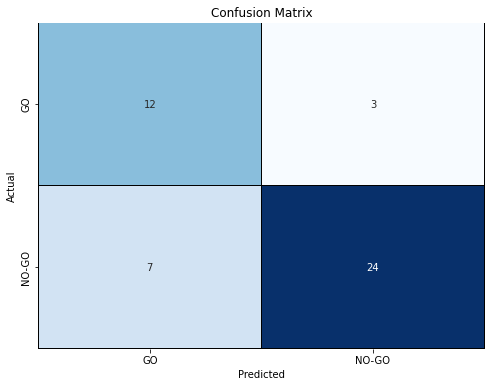

In [84]:
# Generate confusion matrix
cm = confusion_matrix(combined_candidates['binary_HR'], combined_candidates['final_prediction'], labels=['GO', 'NO-GO'])

# Convert confusion matrix to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['GO', 'NO-GO'], columns=['GO', 'NO-GO'])
# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


FP - The presence of 7 false positives means that there are 7 candidates who were incorrectly classified as high-potential ("GO") but are actually not. there is a moderate risk of overestimating candidate quality. which could lead to potential hiring on inaccurate assessments.
FN - The presence of 3 false negatives means that 3 high-potential candidates were incorrectly classified as not suitable ("NO-GO"). While the number is relatively small, together with the 7 false positives, we have misclassified 10 candidates out of 46 total candidates. This is significant as it represents a substantial portion of the candidate numbers. The impact of these misclassifications could result in either missed opportunities to hire high-potential candidates or unnecessary investments in candidates who may not perform as expected, and we would like to minimize this number further.

# Section 3